In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
data = pd.read_csv(r'/Users/harrison/PycharmProjects/datasets/kaggle/bank-marketing/bank-additional-full.csv',
                   sep=';' )

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
for i in data:
    print(i, ' - ', data[i].dtype)

age  -  int64
job  -  object
marital  -  object
education  -  object
default  -  object
housing  -  object
loan  -  object
contact  -  object
month  -  object
day_of_week  -  object
duration  -  int64
campaign  -  int64
pdays  -  int64
previous  -  int64
poutcome  -  object
emp.var.rate  -  float64
cons.price.idx  -  float64
cons.conf.idx  -  float64
euribor3m  -  float64
nr.employed  -  float64
y  -  object


In [5]:
# check the data
cat_data = list()
int_data = list()
float_dta = list()

for i in data:
    if data[i].dtype == 'object' and i != 'y':
        cat_data.append(i)
    elif data[i].dtype == 'int64':
        int_data.append(i)
    elif data[i].dtype == 'float64':
        float_dta.append(i)
        
print(cat_data)
print(int_data)
print(float_dta)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['age', 'duration', 'campaign', 'pdays', 'previous']
['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [27]:
# check the cat_data
for i in cat_data:
    print(data[i].value_counts(),'\n')

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

cellular     26144
telephone    15044
Name: contact, dtype: int64 

may    13769
jul     717

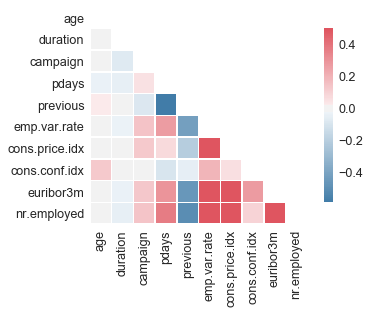

In [4]:
# correlation map
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmax=.5, 
                cmap=sns.diverging_palette(240, 10, as_cmap=True), center=0, 
                square=True, linewidths=.5, cbar_kws={"shrink": .8})